In [1]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from ipywidgets import interact

import sys
# import band plotter
sys.path.append('..')
from src.band_plotters import plot, DATA_DIRECTORY


In [2]:
def show(x):

    example = DATA_DIRECTORY/f"bands/2dm-{x}.json"
    bands_dict=json.load(open(example))
    bands = np.array(bands_dict["bands"]["1"])
    plt.imshow(bands)

interact(show, x=90)

interactive(children=(IntSlider(value=90, description='x', max=270, min=-90), Output()), _dom_classes=('widget…

<function __main__.show(x)>

[False False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False False False False]


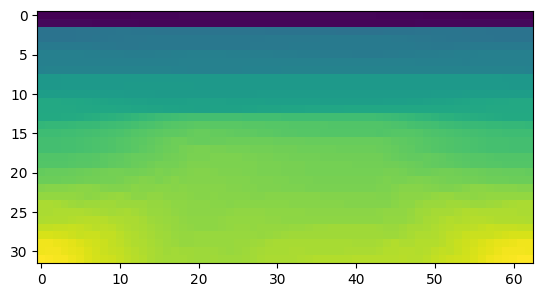

In [12]:
x=1
example = DATA_DIRECTORY/f"bands/2dm-{x}.json"
bands_dict=json.load(open(example))
bands = np.array(bands_dict["bands"]["1"]) - bands_dict["efermi"]
distance_from_efermi = np.abs(bands)
mask = (distance_from_efermi < 8).any(axis=1)
print(mask)
plt.imshow(bands)


In [13]:
def get_bands_that_come_near_fermi_level(bands, threshold=8):
    '''
    bands - band energies with efermi subtracted
    threshold - distance that bands must approach (at any point!) to be included
    '''
    distance_from_efermi = np.abs(bands)
    mask = (distance_from_efermi < 8).any(axis=1)
    return bands[mask]

In [17]:
def show(x):

    example = DATA_DIRECTORY/f"bands/2dm-{x}.json"
    bands_dict=json.load(open(example))
    bands = np.array(bands_dict["bands"]["1"]) - bands_dict["efermi"]
    plt.imshow(bands)
    plt.show()
    bands = get_bands_that_come_near_fermi_level(bands)
    plt.imshow(bands)

interact(show, x=90)

interactive(children=(IntSlider(value=90, description='x', max=270, min=-90), Output()), _dom_classes=('widget…

<function __main__.show(x)>